# Unsupervised Learning (UL) part

## C. 1. Iris clustering with K-means (4.5 points)

1. *(0.5 points) <span style="color:red"> Study how the K-means algorithm works and describe it in 3-5 short sentences in your own words in your report.* </span>

The K-Means algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping clusters where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as "far" as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous the data points are within the same cluster.

2. *(0.5 point) <span style="color:red"> Run k-means as provided by the scikit-learn library on the iris dataset used in the lecture before. Implement your solution in kmeans_iris.py. Plot the data columns pairwise as scatter plots, colored by the different clusters determined by k-Means.* </span>

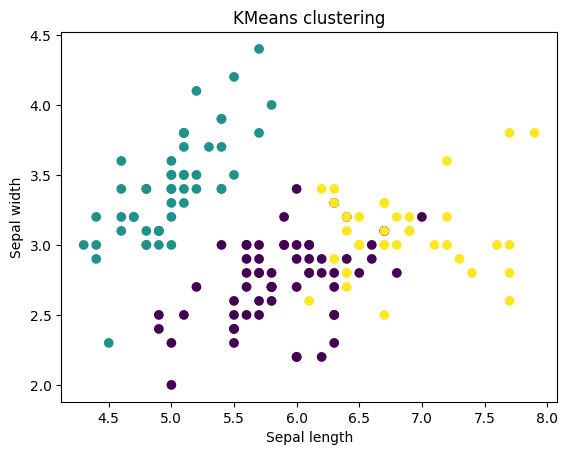

In [36]:
# Content of kmeans_iris.py

import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# Load the iris dataset
# The iris dataset is within iris.csv file, which is on the form (example) :
# [Start of example]
# sepal_length,sepal_width,petal_length,petal_width,species
# 5.1,3.5,1.4,0.2,setosa
# [End of example]
iris = open("iris.csv")
iris = csv.reader(iris)
iris = np.array(list(iris))

# Get the data
X = iris[1:, 0:4]
# Get the labels
y = iris[1:, 4]

# Convert the data to float
X = X.astype(float)

# Create the model
kmeans = KMeans(n_clusters=3, random_state=0, n_init=2)

# The plot needs to be done in 2D, and we also need to plot the data columns pairwise as scatter plots,
# colored by the differents clusters determined by the kmeans algorithm.
# We will use the following function to plot the data

def plot_iris(X, y, title):
    # Create a figure
    plt.figure()
    # Plot the data
    plt.scatter(X[:, 0], X[:, 1], c=y)
    # Set the title
    plt.title(title)
    # Set the axis labels
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    # Show the plot
    plt.show()

# Fit the model
kmeans.fit(X)

# Get the labels
y_pred = kmeans.labels_

# Plot the data
plot_iris(X, y_pred, "KMeans clustering")


3. *(1.0 point) <span style="color:red"> Using the data labels, compute and report the accuracy and the confusion matrix for
the produced clusters. Motivate based on these results whether the trained model is suitable for
this problem.* </span>

In [23]:
# Getting the accuracy of the model

def get_accuracy(y_pred, y_true):
    # Convert string labels to numerical labels
    label_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
    y_true = [label_map[label.lower()] for label in y_true]
    
    # Get the number of correct predictions
    n_correct = 0
    # For each prediction
    for i in range(len(y_pred)):
        # If the prediction is correct
        if y_pred[i] == y_true[i]:
            # Increment the number of correct predictions
            n_correct += 1
    # Return the accuracy
    return n_correct / len(y_pred)

# Get the accuracy
accuracy = get_accuracy(y_pred, y)

# Print the accuracy
print("Accuracy: {:.2f}".format(accuracy))

# Getting the confusion matrix of the model

def get_confusion_matrix(y_pred, y_true):
    # Convert string labels to numerical labels
    label_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
    y_true = [label_map[label.lower()] for label in y_true]
    
    # Create the confusion matrix
    confusion_matrix = np.zeros((3, 3))
    # For each prediction
    for i in range(len(y_pred)):
        # Increment the confusion matrix
        confusion_matrix[y_pred[i], y_true[i]] += 1
    # Return the confusion matrix
    return confusion_matrix

# Get the confusion matrix
confusion_matrix = get_confusion_matrix(y_pred, y)

# Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix)

Accuracy: 0.24
Confusion matrix:
[[ 0. 48. 14.]
 [50.  0.  0.]
 [ 0.  2. 36.]]


We see that the model is not suitable because the accuracy is low and the confusion matrix shows that the model is not able to predict the right cluster for the data points.

4. *(0.5 point) <span style="color:red"> Compute the average silhouette score for each cluster and describe what this metric means.*

In [39]:
# Computing the average silhouette score for each cluster of the model

from sklearn.metrics import silhouette_score

# Compute the silhouette scores
silhouette_scores = silhouette_score(X, y_pred)

# Print the silhouette scores
print("Silhouette scores: {:.2f}".format(silhouette_scores))

Silhouette scores: 0.55


We have a silhouette score of 0.55 which means that the clusters are not well separated : the silouette score is there as a measure of how close each point in one cluster is to points in the neighboring clusters. This is the metric means.

5. *(1.0 point) <span style="color:red"> unknown species.csv contains 6 iris flowers whose species are unknown yet. Use your trained k-means model to predict which cluster these new flowers belong to. In the report provide a list that assigns the iris species determined by K-means to each id of the unknown flowers. Also, compute (in code) and report the silhouette score for each individual flower and explain the meaning of the silhouette score.* </span>

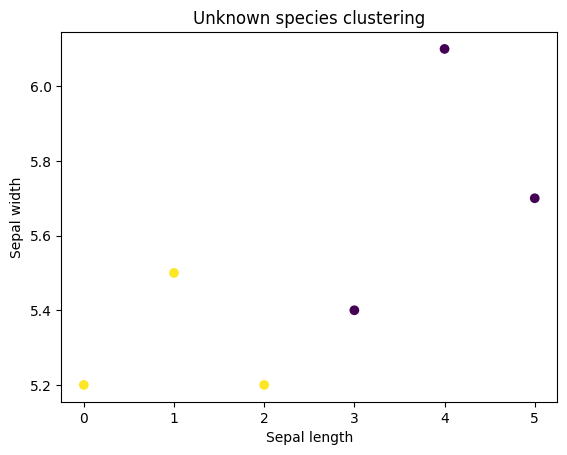

In [40]:
# Using the model to predict which cluster the new flowers introduced by unknown_species.csv belong to.

# Loading the unknown species dataset.
unknown_species = open("unknown_species.csv")
unknown_species = csv.reader(unknown_species)
unknown_species = np.array(list(unknown_species))

# Getting the data.
X_unknown = unknown_species[1:, 0:4]
# Getting the labels.
y_unknown = unknown_species[1:, 4]

# Converting the data to float.
X_unknown = X_unknown.astype(float)

# Predicting the clusters.
y_unknown_pred = kmeans.predict(X_unknown)

# Plot the data.
plot_iris(X_unknown, y_unknown_pred, "Unknown species clustering")